# MNIST 학습

In [9]:
# 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀기
import tensorflow as tf
tf.keras.datasets.mnist.load_data()
tf.data.Dataset

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터 로드
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드함
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어 줌
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)


################
# 신경망 모델 구성
################
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있음
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성 값으로 정함
X = tf.placeholder(tf.float32, [None, 784])

# 결과는 0~9 의 10 가지 분류를 가짐
Y = tf.placeholder(tf.float32, [None, 10])
# 신경망의 레이어는 다음처럼 구성
# 784(입력 특성 값) -> 256 (히든레이어 뉴런 개수) -> 256 (히든레이어 뉴런 개수) -> 10 (결과값 0~9 분류)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력 값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듦
# 표준 편차가 0.01인 정규분포를 가지는 임의의 값으로 뉴런(변수)를 초기화
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력 값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듦
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력 값은 W3 변수를 곱해 10개의 분류를 가지게 됨
model = tf.matmul(L2, W3)


##################
# 신경망 모델 학습
##################
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
for epoch in range(15):
# 학습데이터 전체를 한바퀴 도는 것을 에포크라함
    total_cost = 0
    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해 지정한 크기만큼 학습할 데이터를 가져옴
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')


#########
# 결과 확인
#########
# model 로 예측한 값과 실제 레이블인 Y의 값 비교
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가함
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
sess.close()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.404
Epoch: 0002 Avg. cost = 0.147
Epoch: 0003 Avg. cost = 0.094
Epoch: 0004 Avg. cost = 0.068
Epoch: 0005 Avg. cost = 0.051
Epoch: 0006 Avg. cost = 0.039
Epoch: 0007 Avg. cost = 0.028
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.021
Epoch: 0010 Avg. cost = 0.015
Epoch: 0011 Avg. cost = 0.019
Epoch: 0012 Avg. cost = 0.012
Epoch: 0013 Avg. cost = 0.013
Epoch: 0014 Avg. cost = 0.011
Epoch: 0015 Avg. cost = 0.013
최적화 완료!
정확도: 0.9799


# 드롭아웃 + matplotlib

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 Avg. cost = 0.426
Epoch: 0002 Avg. cost = 0.161
Epoch: 0003 Avg. cost = 0.112
Epoch: 0004 Avg. cost = 0.088
Epoch: 0005 Avg. cost = 0.070
Epoch: 0006 Avg. cost = 0.060
Epoch: 0007 Avg. cost = 0.051
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.042
Epoch: 0010 Avg. cost = 0.039
Epoch: 0011 Avg. cost = 0.032
Epoch: 0012 Avg. cost = 0.030
Epoch: 0013 Avg. cost = 0.030
Epoch: 0014 Avg. cost = 0.026
Epoch: 0015 Avg. cost = 0.025
Epoch: 0016 Avg. cost = 0.025
Epoch: 0017 Avg. cost = 0.025
Epoch: 0018 Avg. cost = 0.022
Epoch: 0019 Avg. cost = 0.021
Epoch: 0020 Avg. cost = 0.020
Epoch: 0021 Avg. cost = 0.021
Epoch: 0022 Avg. cost = 0.019
Epoch: 0023 Avg. cost =

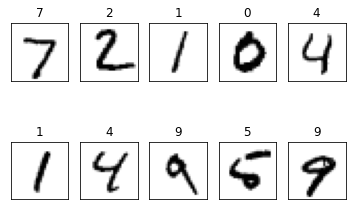

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.keras.datasets.mnist.load_data()
tf.data.Dataset

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


#################
# 신경망 모델 학습
##################
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')

############
# 결과 확인
############
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
# 예측 시에는 keep_prob에 1을 넣어 신경망 전체를 사용
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

#드롭아웃(1-3/4) 코드와 앞부분은 동일
#######################
# 결과 확인 (matplot)
#######################
#테스트 데이터를 이용해 예측 모델을 실행, 결과값을 labels에 저장
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})
#손글씨 출력할 그래프 준비
fig = plt.figure()
for i in range(10):
    #2행 5열의 그래프 만들고, i+1 번째에 숫자 이미지 출력
    subplot = fig.add_subplot(2, 5, i + 1)
    #이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력 안함
    subplot.set_xticks([])
    subplot.set_yticks([])
    #출력한 이미지 위에 예측한 숫자 출력
    #np.argmax는 tf.argmax와 같은 기능의 함수
    # 결과값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로 해당 배열에서 가장 높은 값을 가진인덱스를 예측한 숫자를 가짐
    
    subplot.set_title('%d' % np.argmax(labels[i])) 
    #1차원 배열로 되어 있는 i번째 이미지 데이터를 28*28 형식의 2차원 비열로 변형하여 이미지 형태를 출력
    #cmap 파라미터를 통해 이미지를 그레이스케일로 출력
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
#그래프 출력    
plt.show()
#또는 %matplotlib notebook 을 입력해야 jupyter notebook 에서 이미지 보임
%matplotlib inline

In [12]:
mnist.train.num_examples

55000

In [13]:
mnist.train

In [14]:
mnist

_Datasets(train=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x00000187038ADA58>, validation=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x00000187038AD5F8>, test=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x00000187038AD828>)

In [15]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from 'c:\\users\\jung suk won\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\tensorflow_core\\examples\\tutorials\\mnist\\input_data.py'>

In [16]:
mnist.train.next_batch

<bound method _DataSet.next_batch of <tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x00000187038ADA58>>